Mean validation DSC: 0.5825
Mean validation AUC: 0.8271


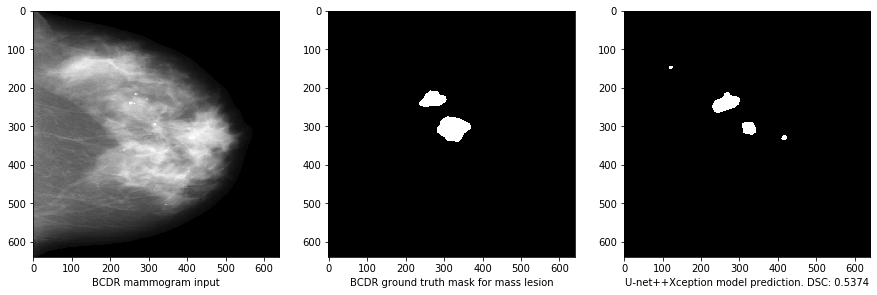

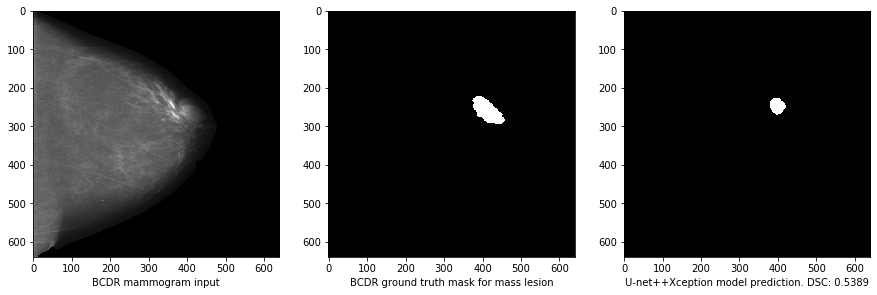

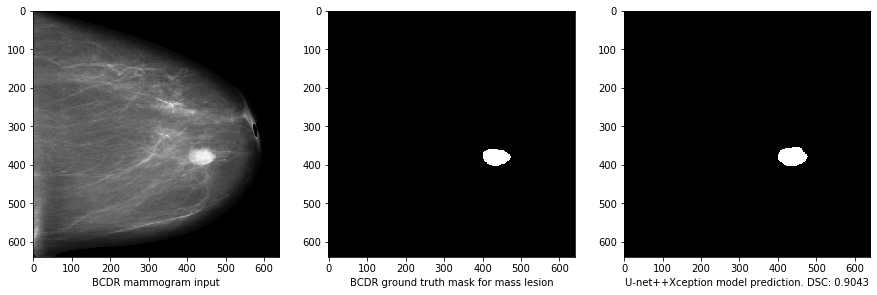

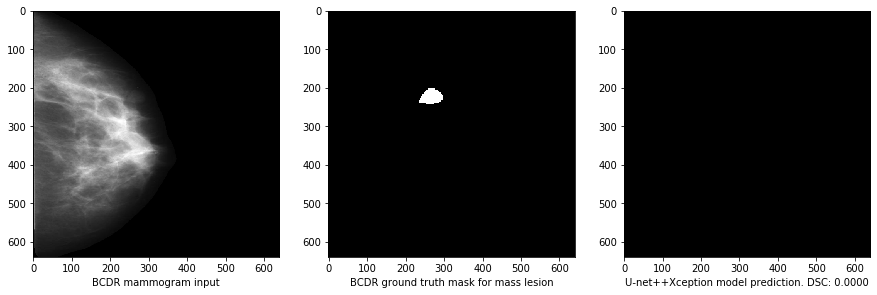

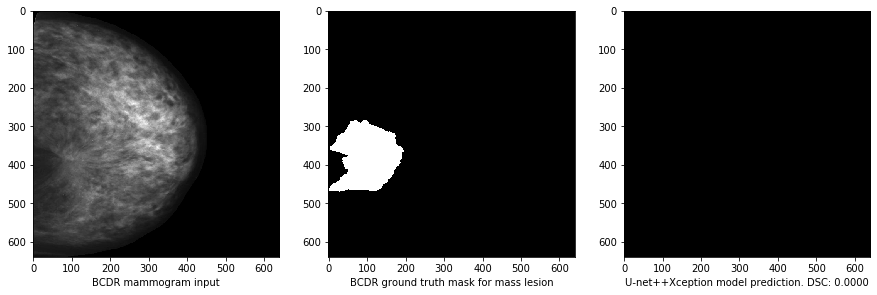

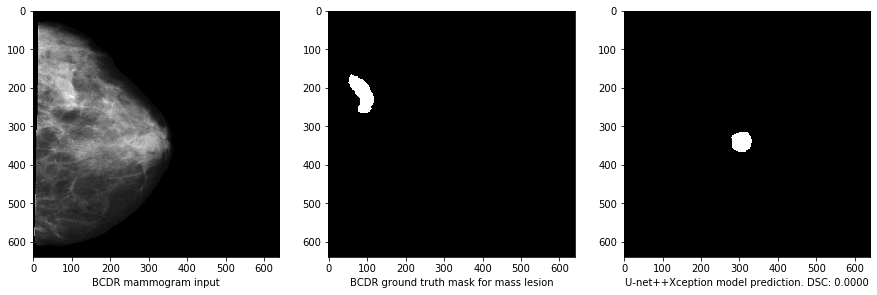

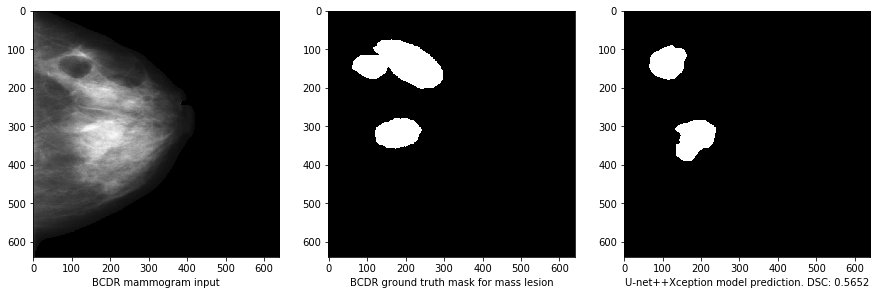

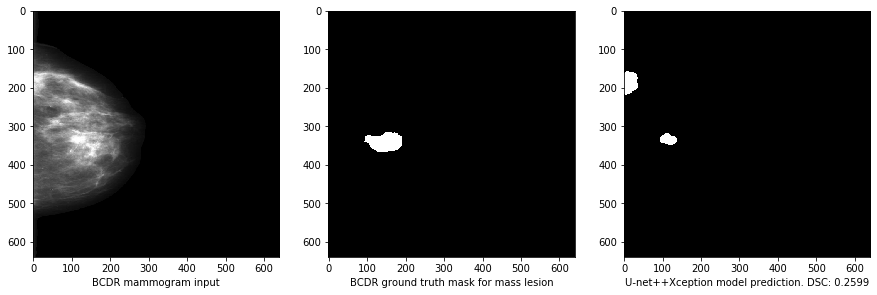

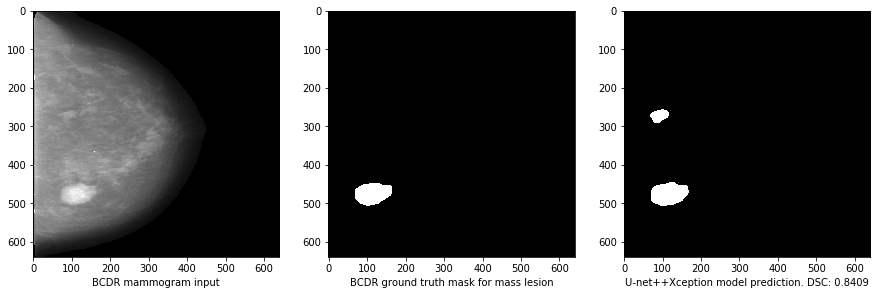

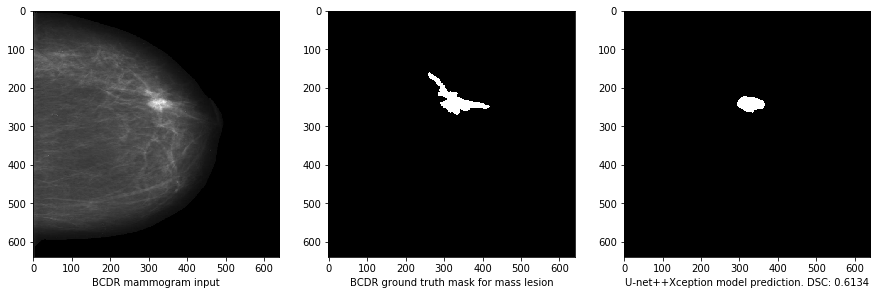

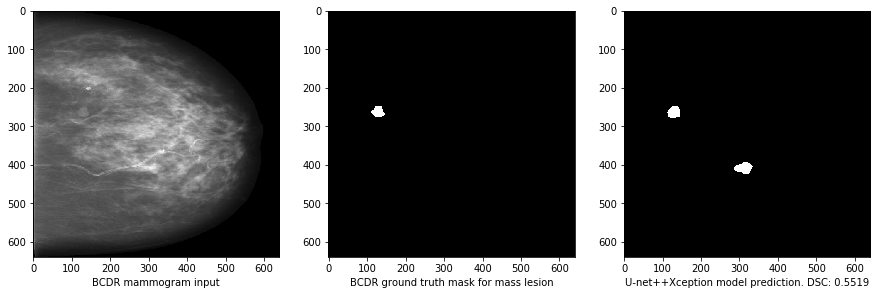

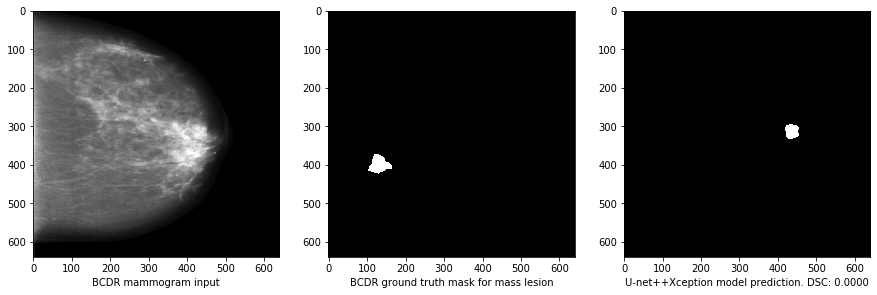

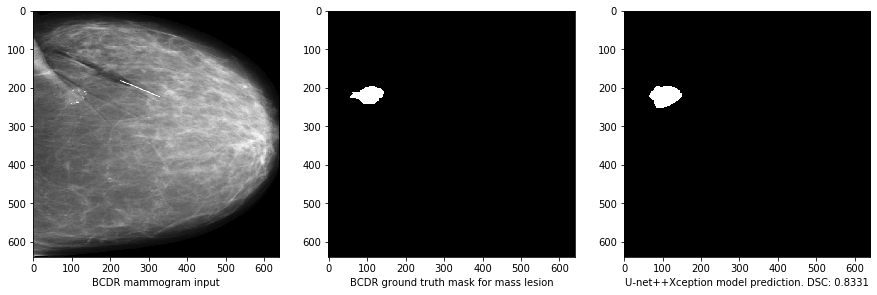

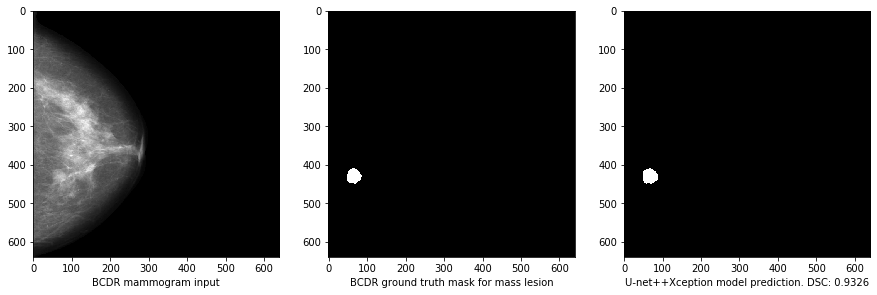

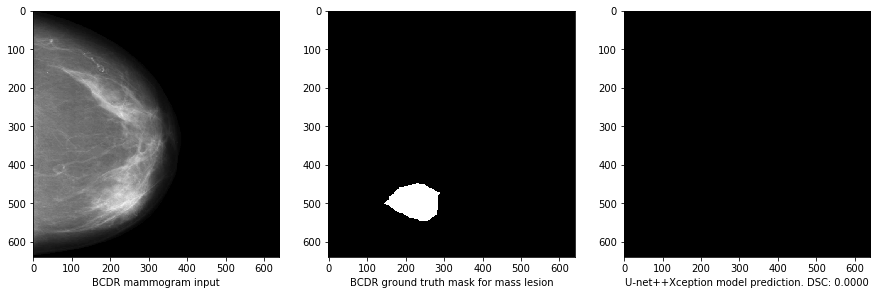

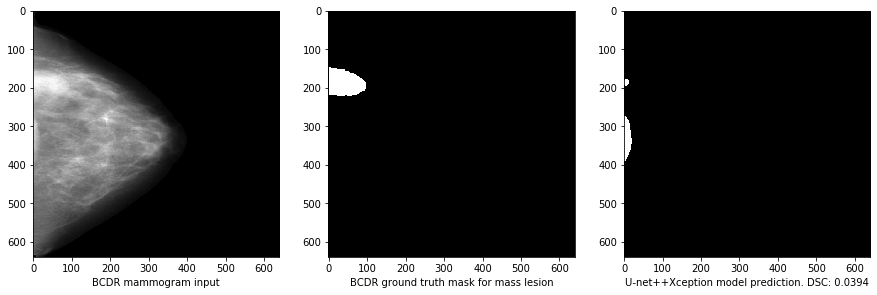

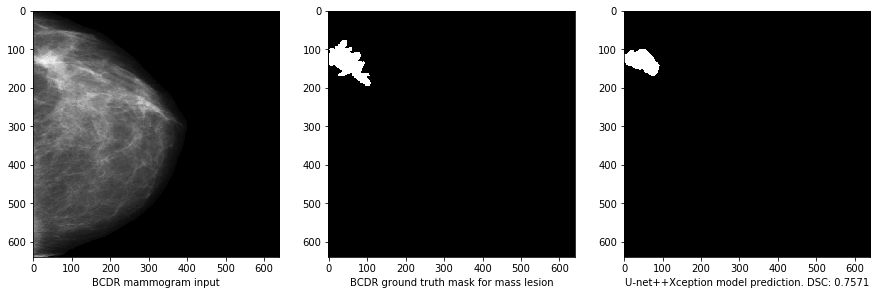

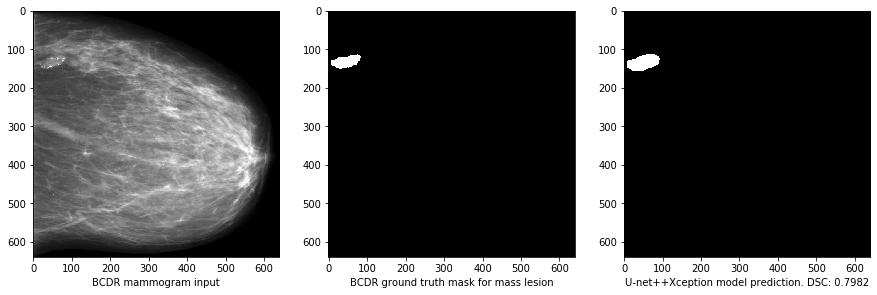

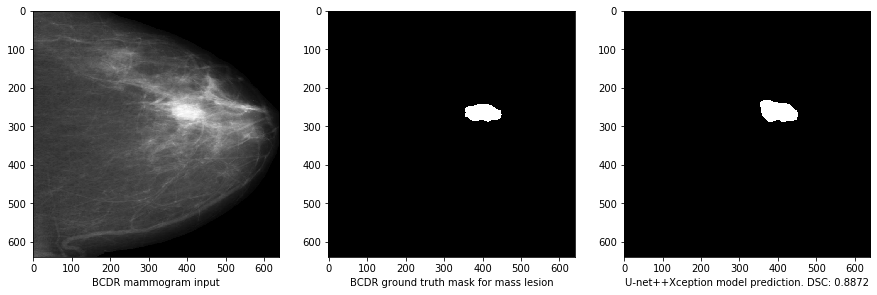

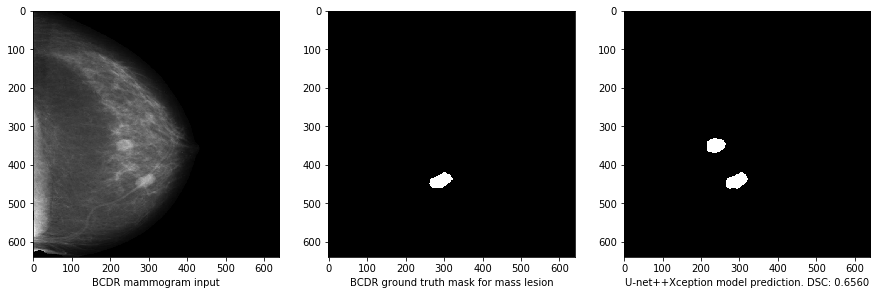

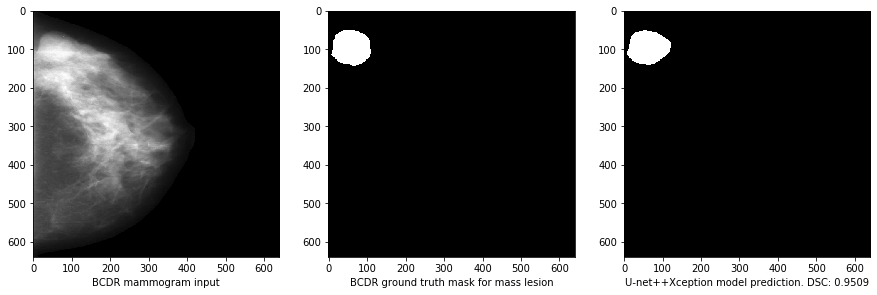

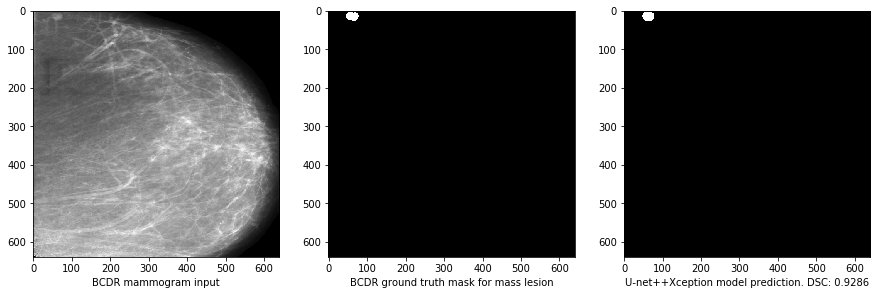

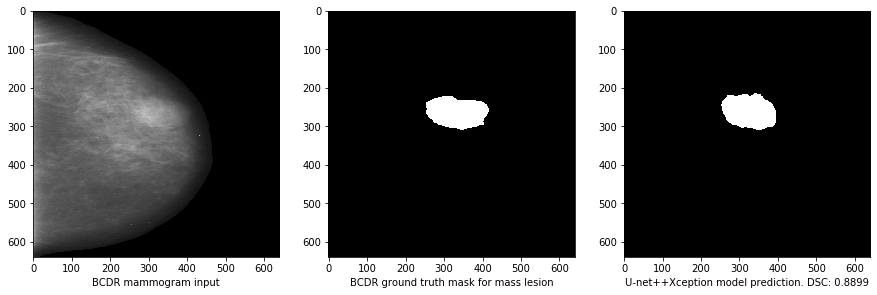

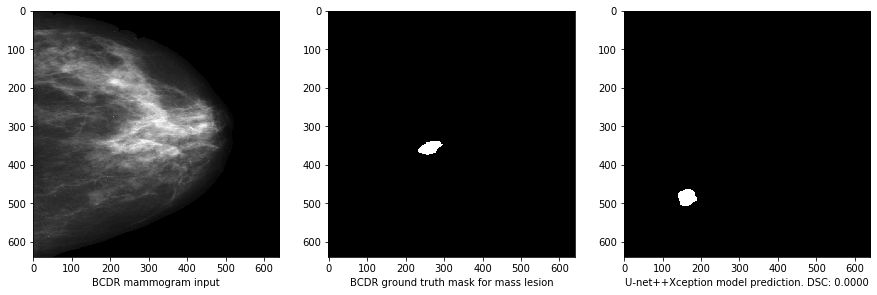

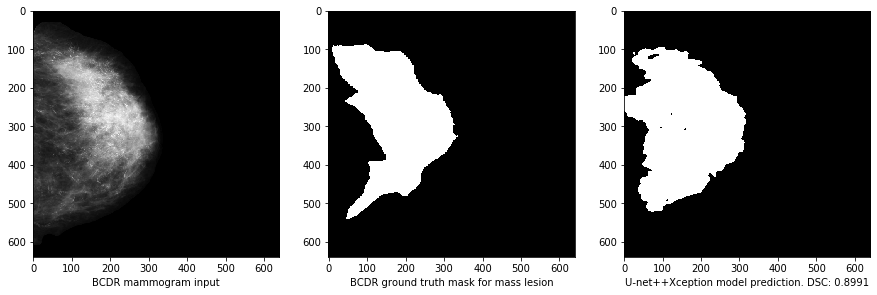

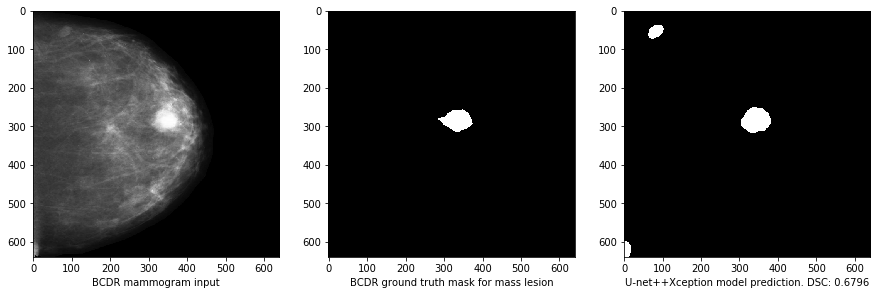

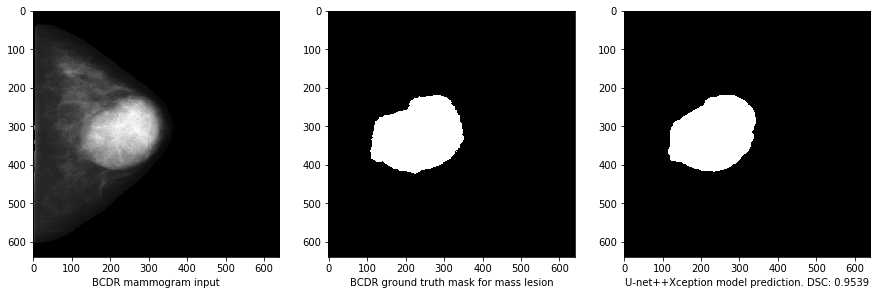

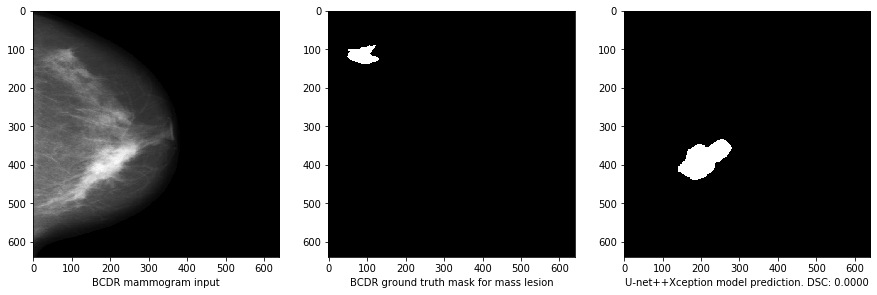

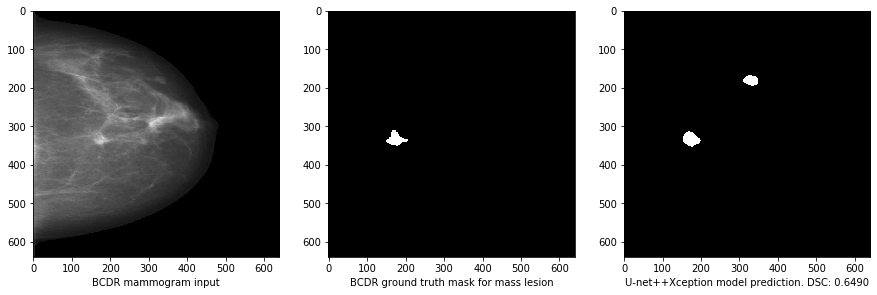

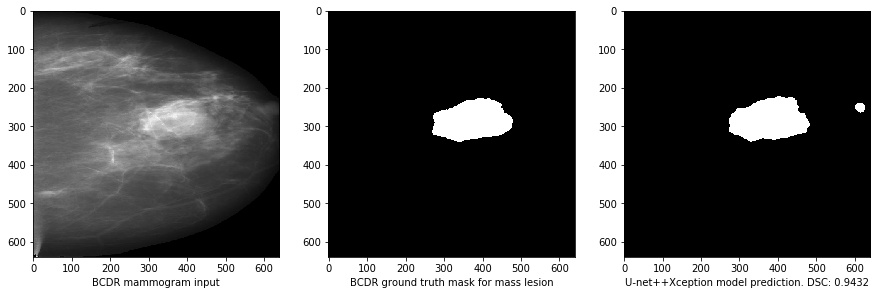

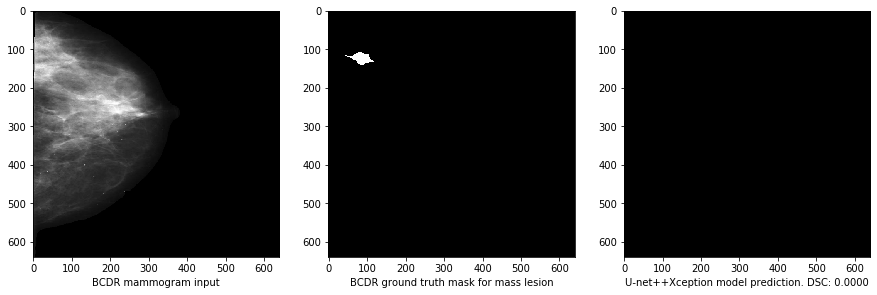

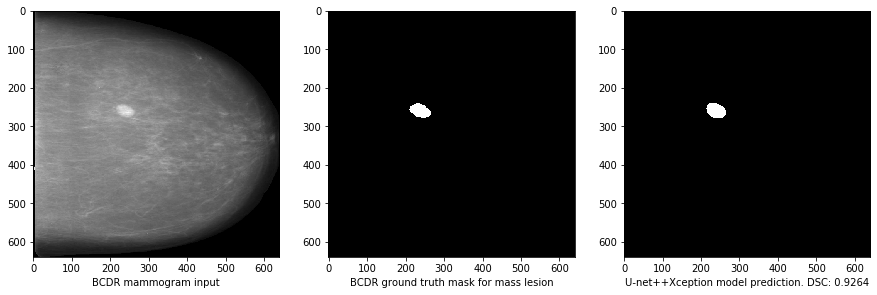

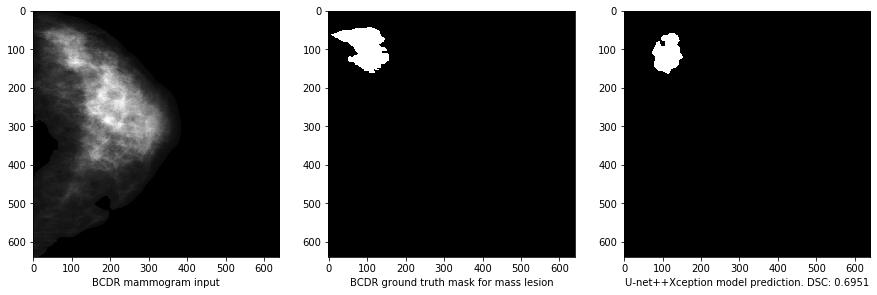

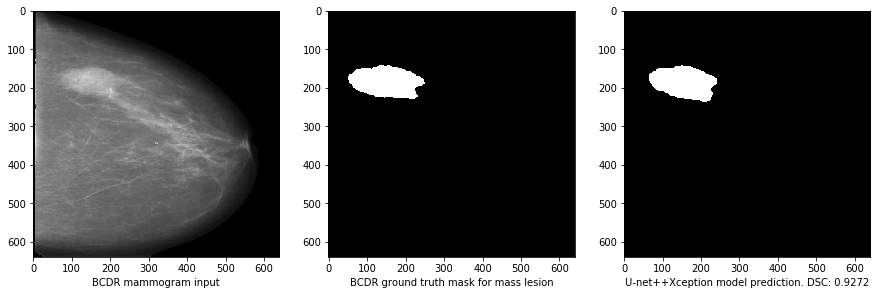

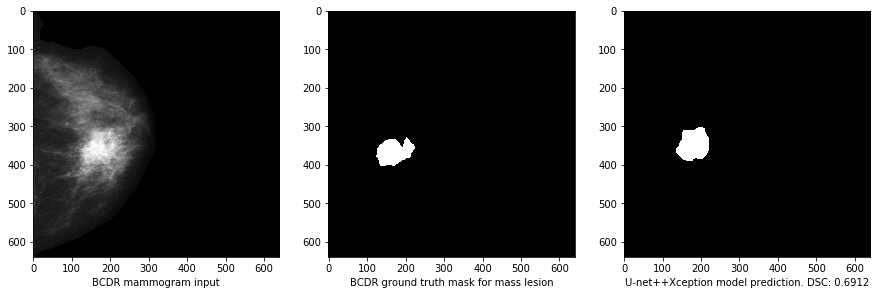

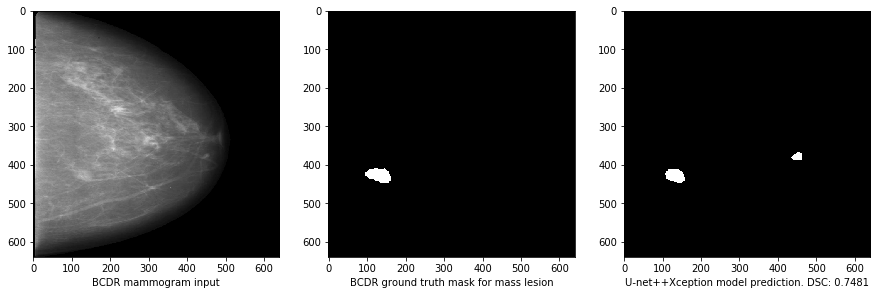

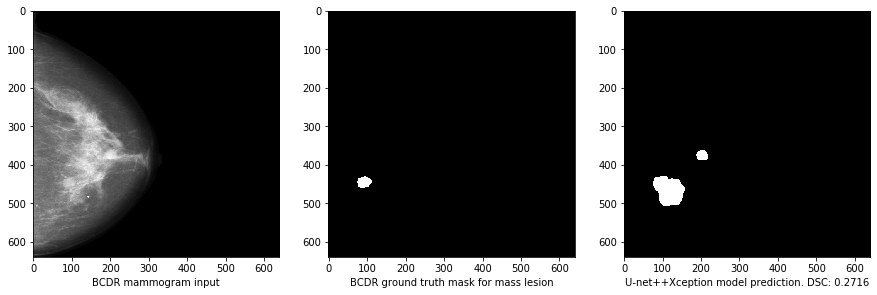

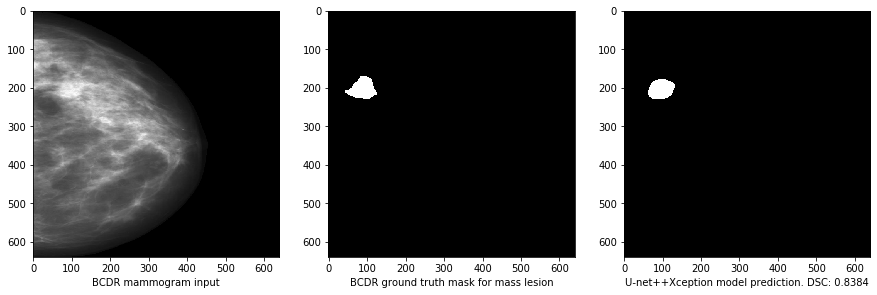

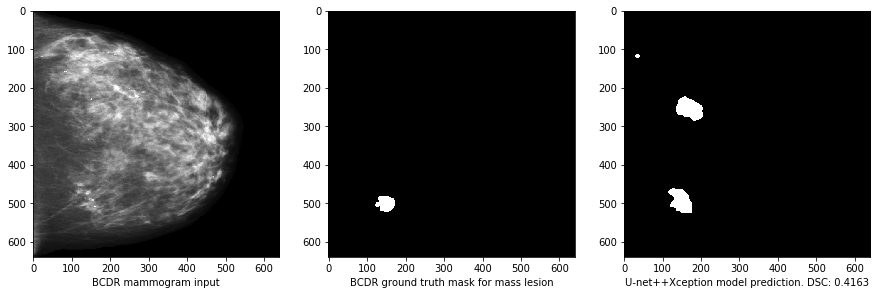

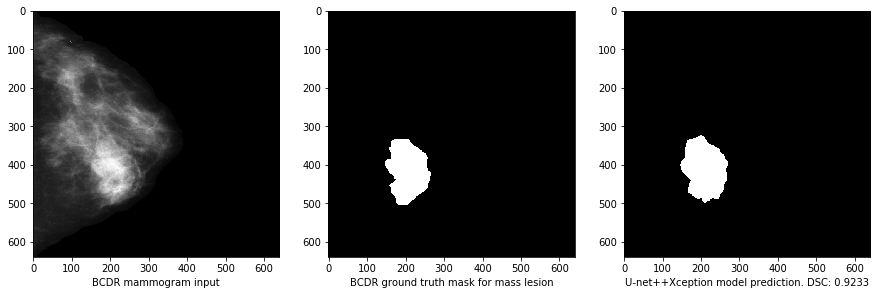

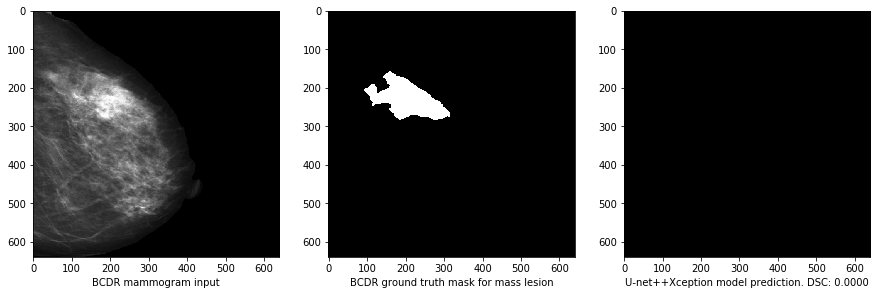

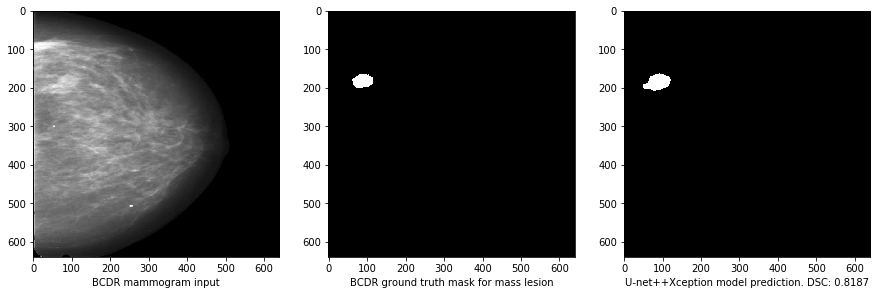

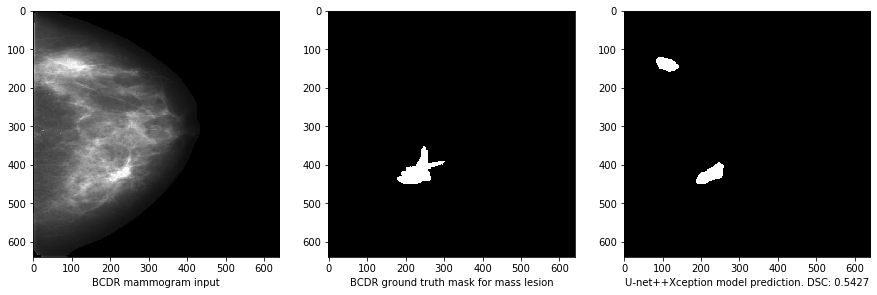

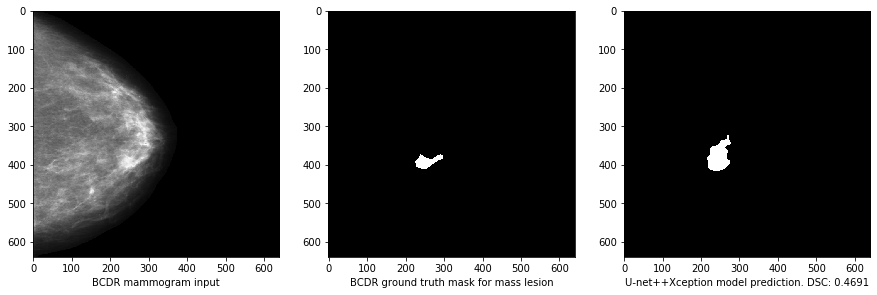

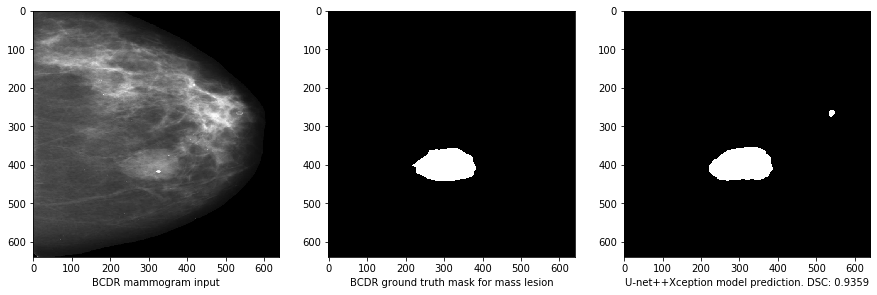

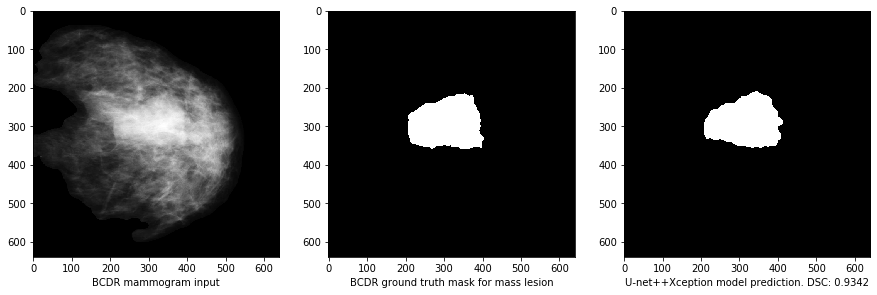

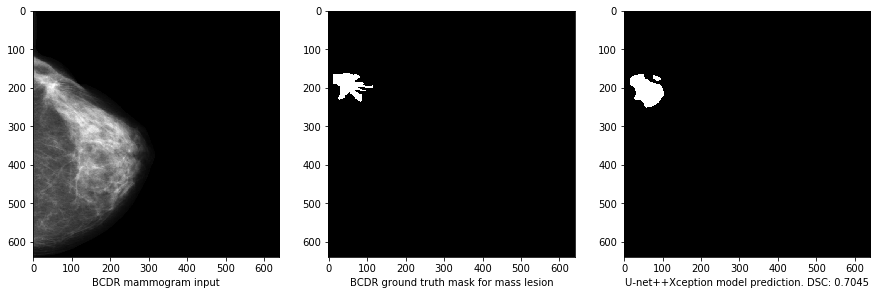

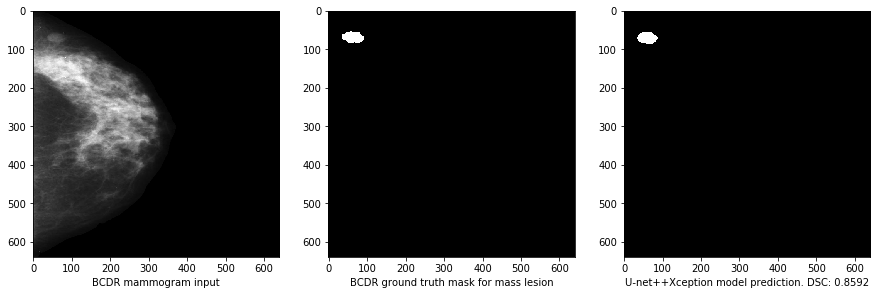

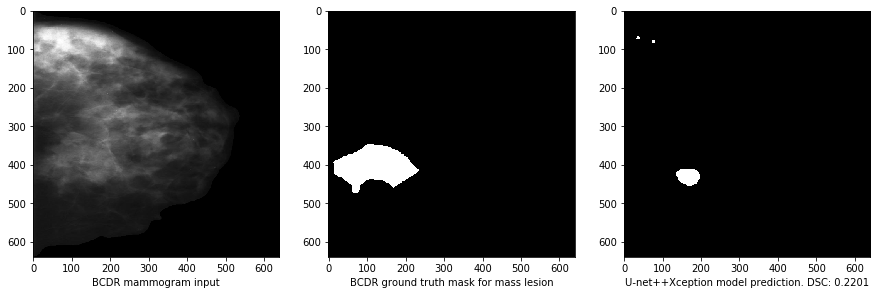

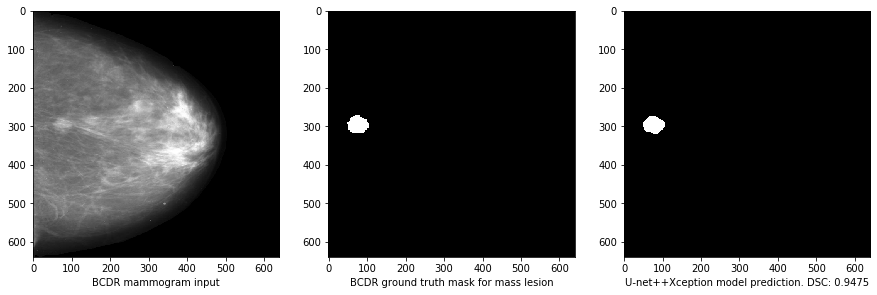

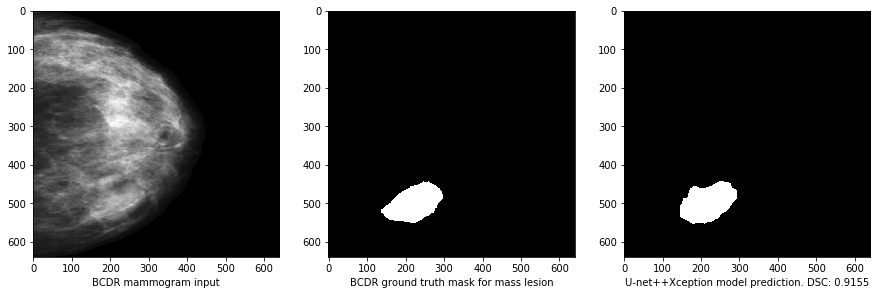

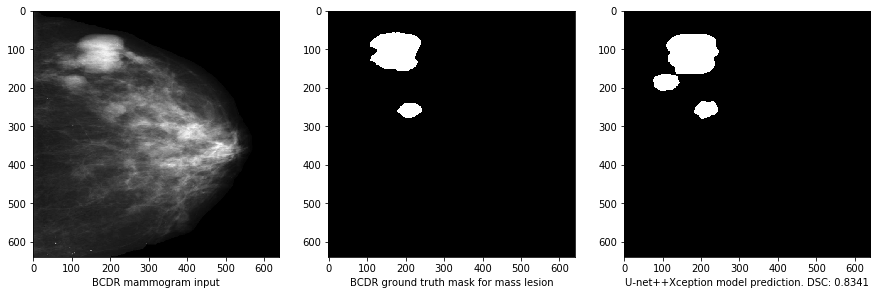

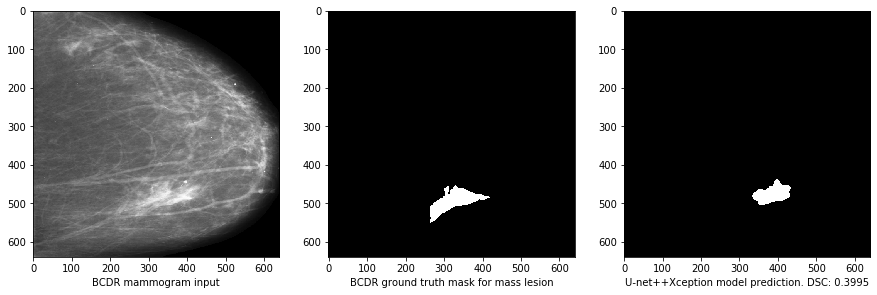

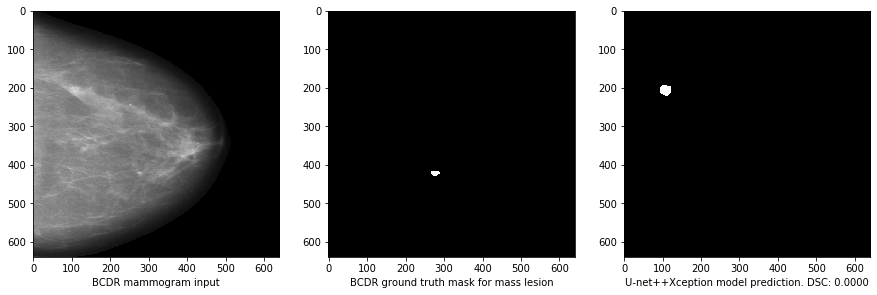

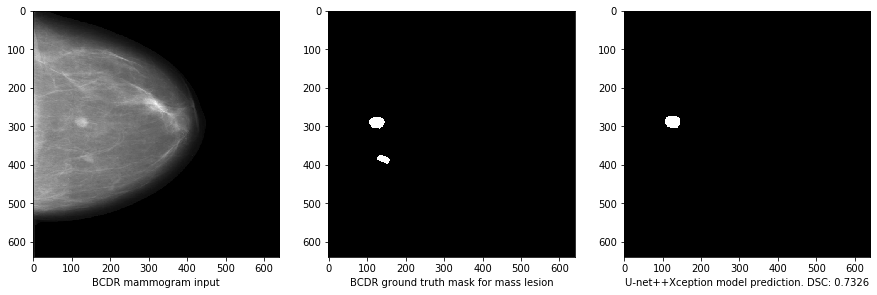

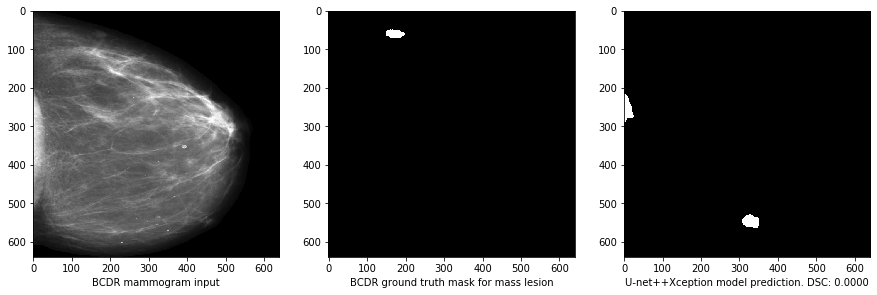

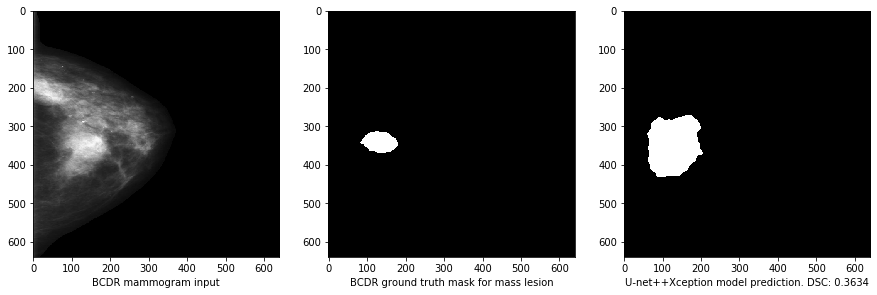

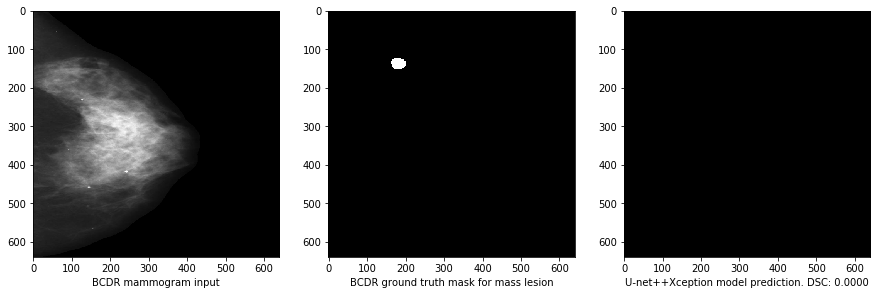

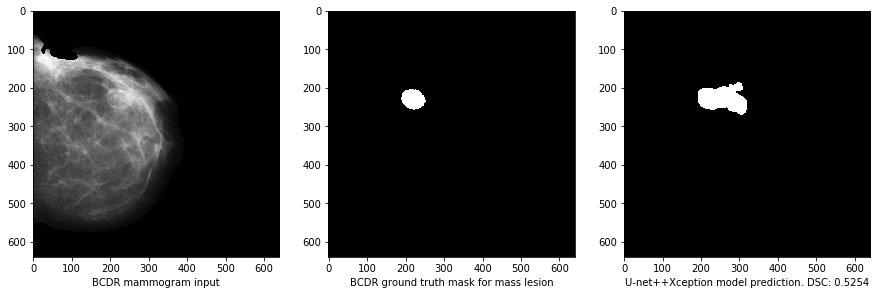

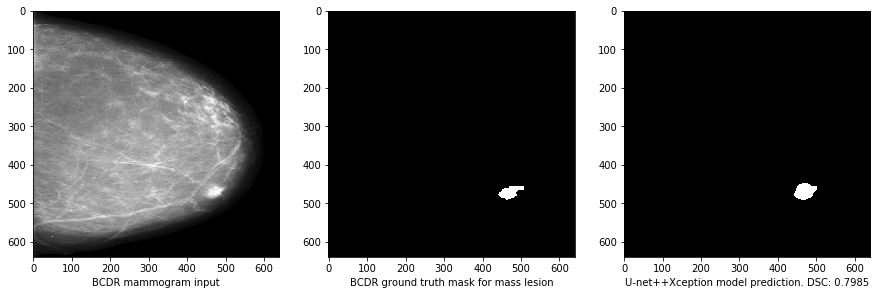

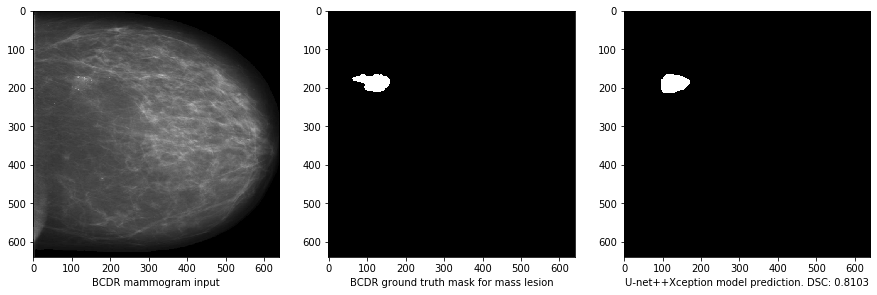

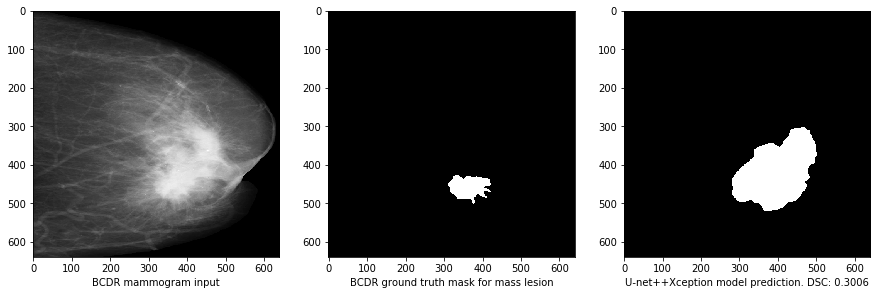

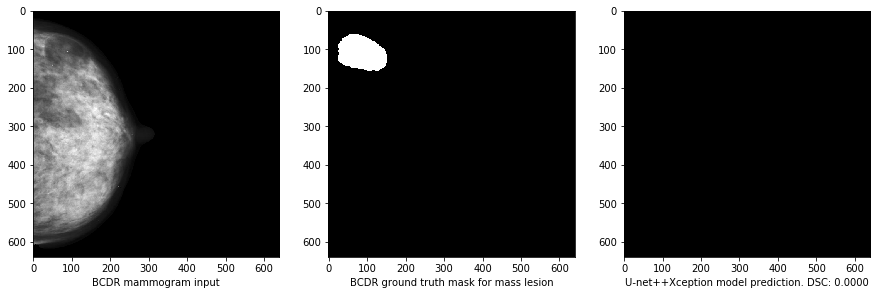

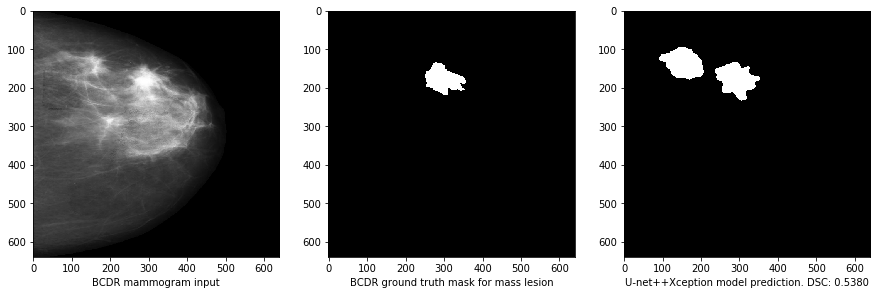

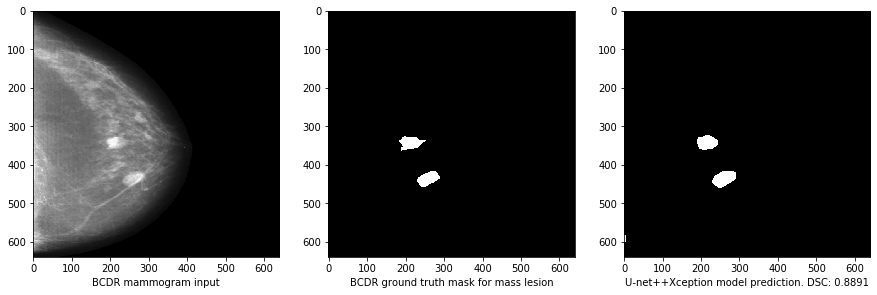

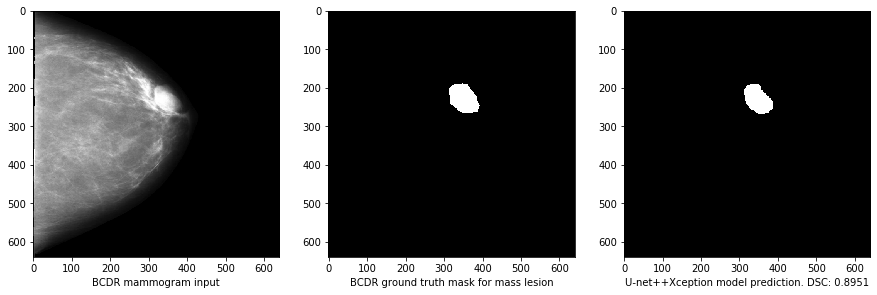

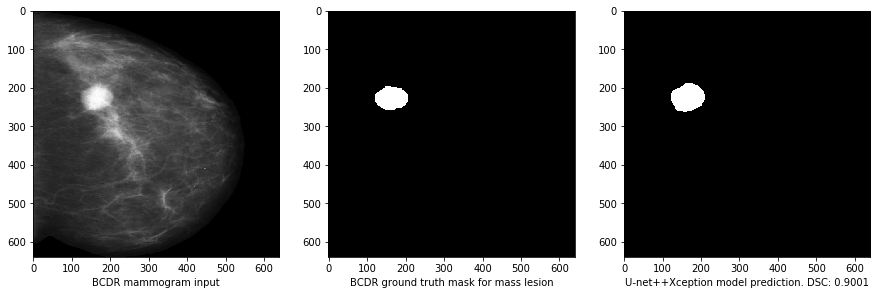

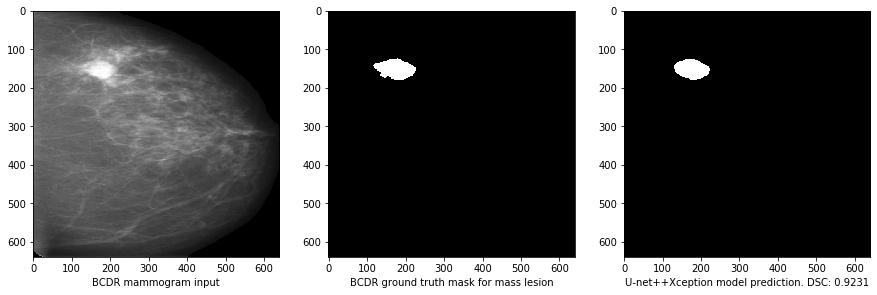

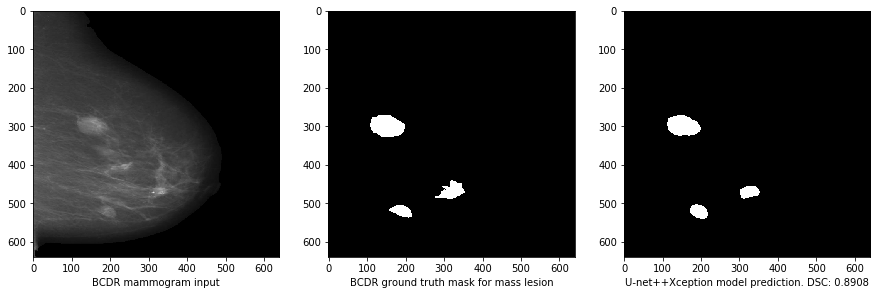

In [1]:
# MASS SEGMENTATION VALIDATION RESULTS
# There are a total of 69 mammograms in the valid_05 folder. Here is the result of each mammogram, its ground truth and the U-net++Xception prediction

import imageio
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score
import numpy as np

target_folder='valid05_pred/' #validation 5 folder thas the closest performance to the mean of all five folders
dsc=list() 
auc=list()

def dice_coef(y_true, y_pred):
    smooth = 1e-15
    intersection = sum(sum(y_true * y_pred))
    score = (2 * intersection + smooth) / (sum(sum(y_true)) + sum(sum(y_pred)) + smooth)
    return score

for num in range (0,69):                       # There are 69 validation images
    mg_name = str(num) + '.png'                # input mammogram
    gt_name = str(num) + '_gt.png'             # ground truth
    pred_name = str(num) + '_predict_v013.png' # unet++xception prediction
    
    mg = cv2.imread(os.path.join(target_folder,mg_name))
    gt = cv2.imread(os.path.join(target_folder,gt_name))
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
    pred = cv2.imread(os.path.join(target_folder,pred_name))
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)

    # Calculate AUC ROC
    gt_flat=gt.flatten()
    pred_flat=pred.flatten()
    auc.append(roc_auc_score(gt_flat, pred_flat))
    
    ret,thresh_pred = cv2.threshold(pred,127,1,cv2.THRESH_BINARY) 
    ret,thresh_gt = cv2.threshold(gt,127,1,cv2.THRESH_BINARY) 
    dsc.append(dice_coef(thresh_gt,thresh_pred))
    
    plt.rcParams.update({'figure.max_open_warning': 0}) #supress warning
    fig = plt.figure()
    fig.set_size_inches(15,15)
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(mg)
    ax1.set_xlabel('BCDR mammogram input')
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(thresh_gt,cmap=plt.cm.gray)
    ax2.set_xlabel('BCDR ground truth mask for mass lesion')
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(thresh_pred,cmap=plt.cm.gray)
    ax3.set_xlabel('U-net++Xception model prediction. DSC: {:.4f}'.format(dsc[num]))


# Print mean DSC and AUC
print('Mean validation DSC: {:.4f}'.format(np.mean(dsc)))
print('Mean validation AUC: {:.4f}'.format(np.mean(auc)))

In [2]:
print(auc)

[0.7151091099943077, 0.6880542980295566, 0.9994458892516244, 0.5, 0.5, 0.49717148024224744, 0.7180383711974485, 0.6129951077262346, 0.9950279057062867, 0.7284670648830183, 0.9938740429883486, 0.49857728064365786, 0.9786019904338552, 0.9959033230883131, 0.5, 0.5111134374718972, 0.8136614363667041, 0.9879567552008424, 0.9961317423358522, 0.9844584226762694, 0.9825111221139637, 0.9704929634508174, 0.9409350776215103, 0.4979490823552474, 0.9240377729704788, 0.9494532132745379, 0.9635422653610626, 0.48963321891132827, 0.9376733097439869, 0.9859533882261367, 0.5, 0.9734524100522097, 0.7752877929268652, 0.950171465855505, 0.8660685091565469, 0.8810757611259902, 0.9870081580830937, 0.9016413465253431, 0.988808369985407, 0.9735219319673867, 0.5, 0.9972922957553717, 0.7530040363194417, 0.8875372727059048, 0.9900240403891989, 0.9594927330461009, 0.9060126663380975, 0.9251516922036884, 0.5628937899830544, 0.9765908416851183, 0.9695328622598041, 0.981541113269838, 0.6658622917911997, 0.499163303594